# Übung 2: Morphologische Operationen

### Einführung

In dieser Übung wollen wir morphologische Operationen in OpenCV betrachten.


In [22]:
# OpenCV needs to be included first
import cv2
import numpy as np

# for displaying images in jupyter

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.dpi']= 400



### Aufgabe 1: Dilate and Erode

Morphologische Operationen werden typischerweise auf binären Bildern angewendet. (Die OpenGL Implementationen verwenden jeweils die Maximum Operationen zwischen Strukturelement und Bild, sodass die Operationen zumindest auch auf Grauwert Bildern durchgeführt werden können, ausserdem werden die Operationen auf allen Kanälen angewendet.)

Ein Beispiel Bild steht unter images/Figuren.png zur Verfügung. Typischerweise erhalten sie ein binäres Bild sonst mit einer Schwellwert (Threshold) Operation.

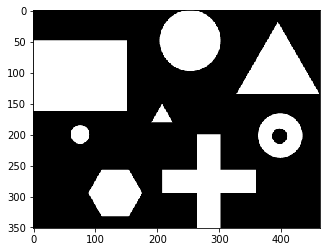

In [2]:
image = cv2.imread('images/Figuren.png')
plt.imshow(image)


Wenden Sie die morphologischen Operationen dilate und erode mit verschiedenen Strukturelementen und verschiedenen Grössen an. Strukturelemente können mit der Funktion `getStructuringElement` erzeugt werden. Die OpenGL Implementation erlaube es auch die Operationen mit einem Aufruf mehrmals anzuwenden.

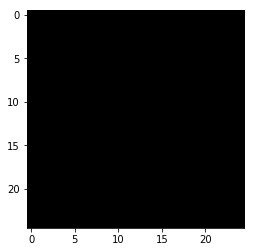

In [13]:
struct = cv2.getStructuringElement(cv2.MORPH_RECT, (25,25))
plt.imshow(struct, cmap='gray')

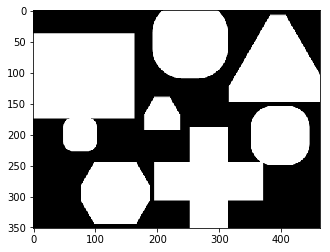

In [14]:
image_dilate = cv2.dilate(image, struct, iterations=1)
plt.imshow(image_dilate)

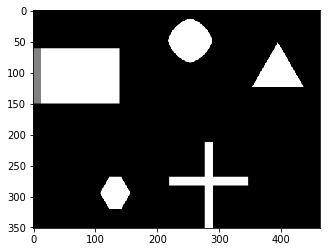

In [15]:
image_erode = cv2.erode(image, struct, iterations=1)
plt.imshow(image_erode)

### Aufgabe 2: Opening/Closing


Für Opening und Closing kann in OpenCV die Funktion `morphologyEx` verwendet werden. Wie wirkt sich opening and closing auf das Beispielbild aus?

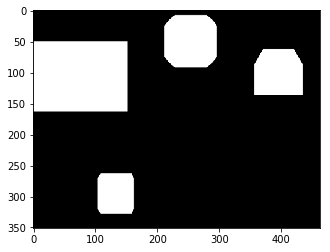

In [18]:
struct = cv2.getStructuringElement(cv2.MORPH_RECT, (50,50))
image_open = cv2.morphologyEx(image, cv2.MORPH_OPEN, struct)
plt.imshow(image_open)  

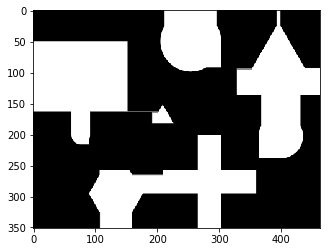

In [19]:
image_close = cv2.morphologyEx(image, cv2.MORPH_CLOSE, struct)
plt.imshow(image_close)
# Mehrere nahe beieinander liegende Formen verschmelzen miteinander

### Aufgabe 3: Kugeln zählen

Finden Sie eine Sequenz von OpenCV Operationen die die Kugeln in folgenden Bild zählt? Als Ausgabe sollten sie dann also schlussendlich eine Zahl (zu Speichern in `nr_kugeln`) erhalten.

Hinweis: Beachten Sie dass die Kugeln schwarz auf hellem Hintergrund dargestellt sind.


Anzahl Kugeln: 78


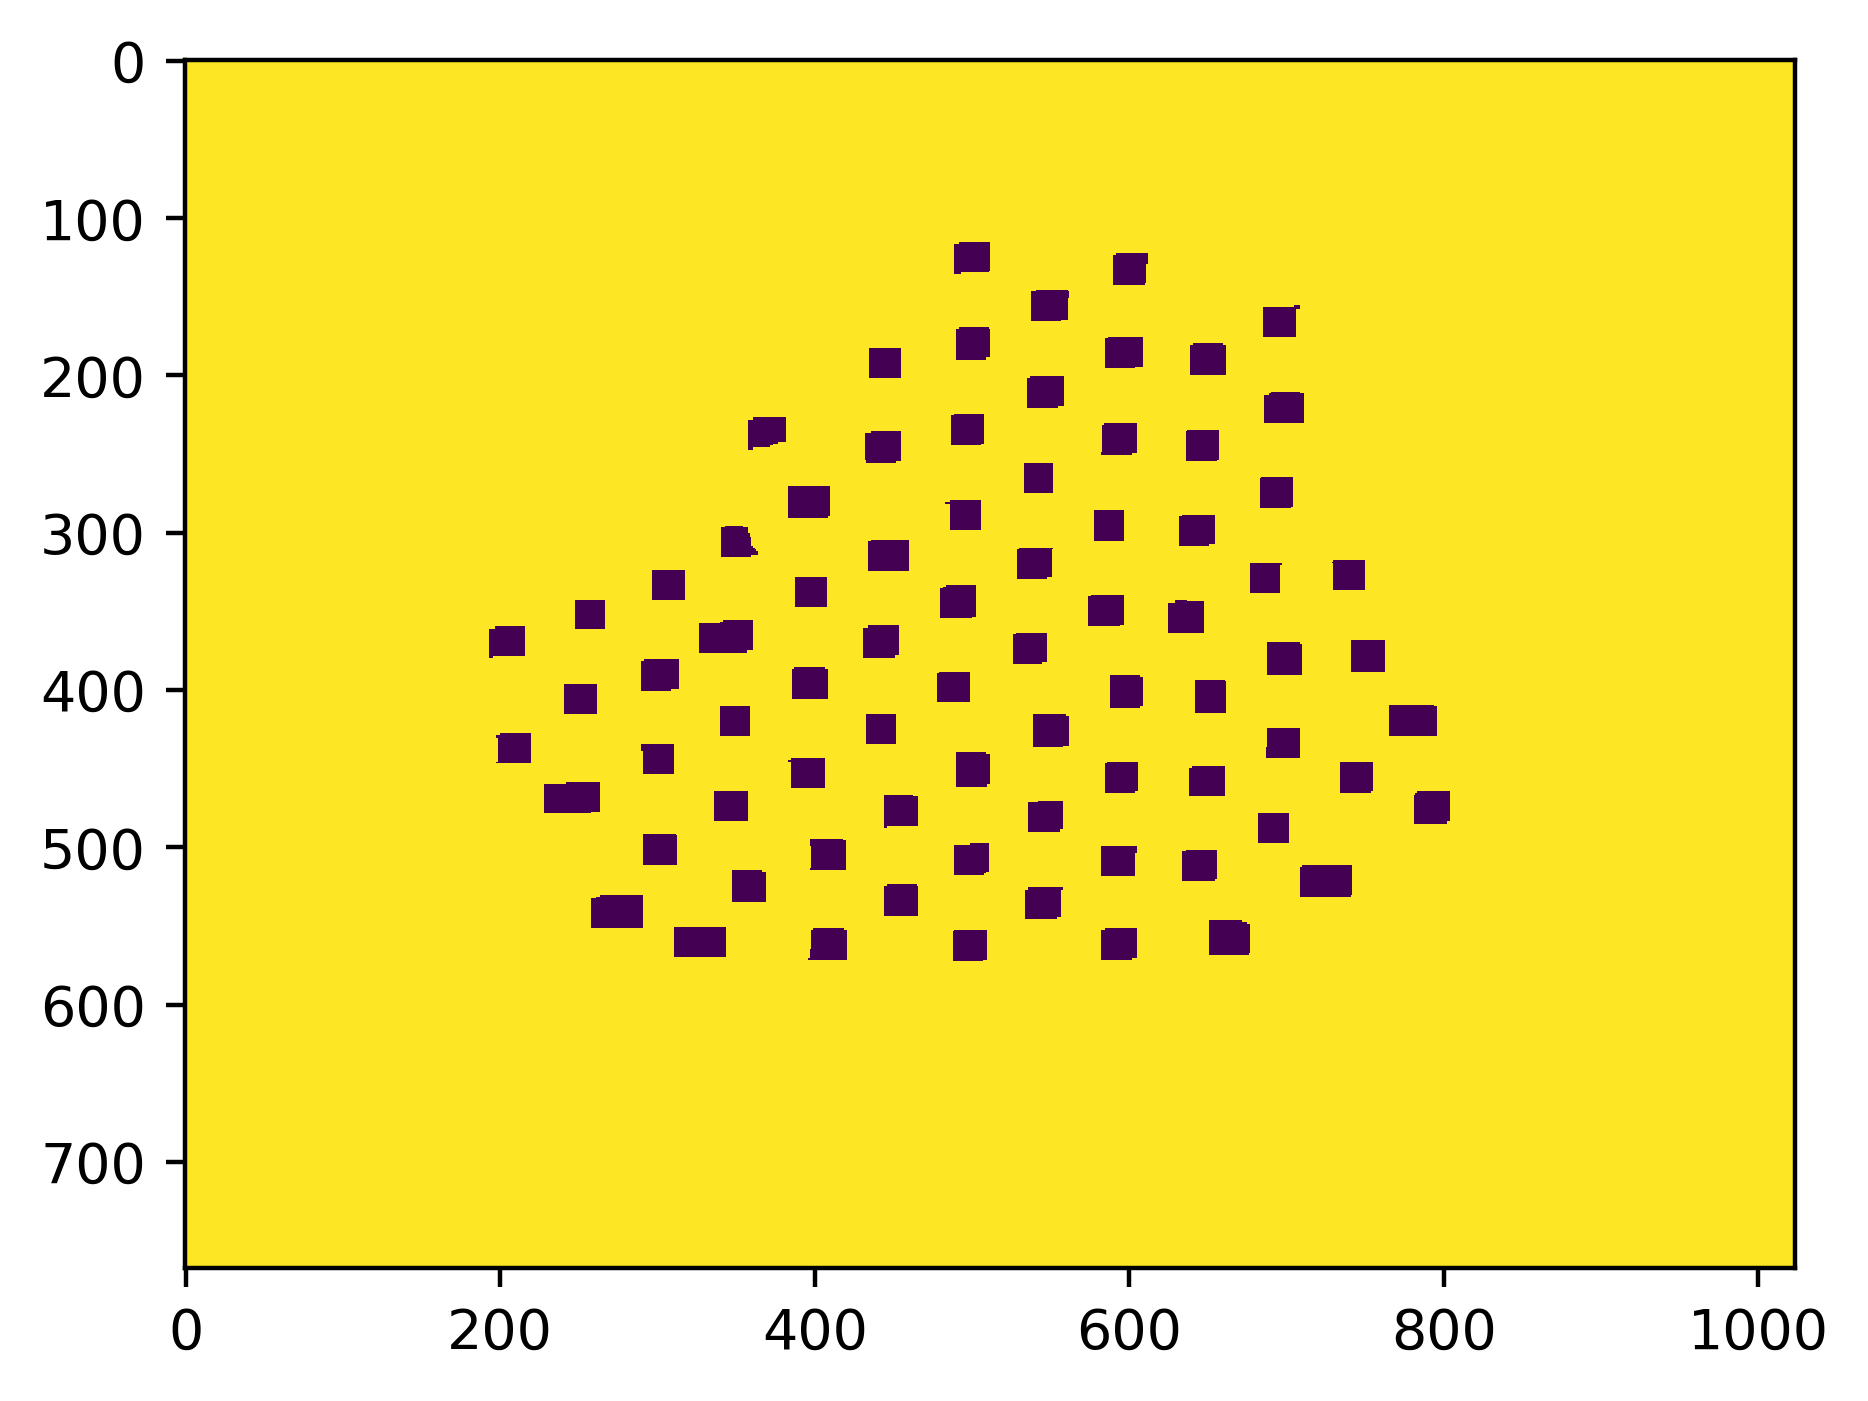

In [166]:
nr_kugeln = 0
struct = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
kugeln = cv2.imread('images/Kugeln.jpg')
kugeln = cv2.dilate(kugeln, struct, iterations=6)
kugeln = cv2.erode(kugeln, struct, iterations=6)
kugeln_gray = cv2.cvtColor(kugeln, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(kugeln_gray,127,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,95,1)
struct = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
thresh = cv2.erode(thresh, struct, iterations=3)
thresh = cv2.dilate(thresh, struct, iterations=6)
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    nr_kugeln += 1
plt.imshow(thresh)
print('Anzahl Kugeln: {}'.format(nr_kugeln))